**Práctica 8: Análisis de varianza y de componentes principales**
    
Análisis de varianza (ANOVA) es una herramienta para cuantificar sí o no una variable o factor tiene un efecto estadísticamente significativo en una variable de interés. Se realiza a partir de la salida del modelo de regresión que se obtiene con otra versión de ols.

Hay [tres tipos de ANOVA](https://mcfromnz.wordpress.com/2011/03/02/anova-type-iiiiii-ss-explained/), cuyo uso depende de sí o no se espera contar con interacciones entre las variables de entrada y sí o lo los datos son [balanceados](https://www.statisticshowto.datasciencecentral.com/balanced-and-unbalanced-designs/).

La hipótesis nula en ANOVA es que no haya diferencias; si el valor p de una variable es menor a la significancia establecida (para nosotros 0.05 está bien; con muchos datos muy precisos es mejor usar 0.01), entonces se rechaza la hipótesis nula, concluyendo que esa variable sí tiene un efecto estadísticamente significativo. 

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
datos = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # discretas con elisa
d = pd.DataFrame(datos, columns = ["CF1op", "hrsNum", "eM", "eF"])
d = d.dropna() 
m = ols('CF1op ~ hrsNum + eM + eF', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "no "))

               sum_sq     df          F        PR(>F)
hrsNum     402.883907    1.0   7.698658  6.418963e-03
eM        1748.312778    1.0  33.408289  6.122009e-08
eF        1242.734805    1.0  23.747263  3.424109e-06
Residual  6227.473060  119.0        NaN           NaN
hrsNum es significativo
eM es significativo
eF es significativo
Residual no es significativo


Los residuales son enormes; hay mucha variación por explicar. El modelo no es muy bueno aún.

Agreguemos factores potenciales.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
datos = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # discretas con elisa
d = pd.DataFrame(datos, columns = ["CF1op", "hrsNum", "eM", "eF", "inicio", "hrsEstudio_ini"])
d.hrsEstudio_ini = d.hrsEstudio_ini.replace(['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h'], [1, 1, 0, 1, 0])
d = d.dropna() 
m = ols('CF1op ~ hrsNum + eM + eF + inicio + hrsEstudio_ini', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))


                     sum_sq     df          F    PR(>F)
inicio           524.965987    1.0  11.691939  0.000901
hrsNum            76.374525    1.0   1.700998  0.195064
eM              1117.243640    1.0  24.883030  0.000002
eF               850.115068    1.0  18.933595  0.000032
hrsEstudio_ini   375.271490    1.0   8.357973  0.004684
Residual        4624.681816  103.0        NaN       NaN
inicio es significativo
hrsNum NO es significativo
eM es significativo
eF es significativo
hrsEstudio_ini es significativo
Residual NO es significativo


Con este cambio, las horas trabajadas ya no salieron significativos, pero las demás variables sí. La suma de los cuadrados de los residuales bajó un poco.

Agreguemos interacciones y quitemos lo de estimado final que ya habíamos descartado sin mayor problema en la práctica anterior.

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
datos = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) 
d = pd.DataFrame(datos, columns = ["CF1op", "hrsNum", "eM", "eF", "inicio", "hrsEstudio_ini"])
d.hrsEstudio_ini = d.hrsEstudio_ini.replace(['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h'], [1, 1, 0, 1, 0])
d = d.dropna() 
m = ols('CF1op ~ eM * hrsEstudio_ini + eM * hrsNum + hrsNum * inicio + eM * inicio + hrsEstudio_ini * inicio', \
        data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))

                            sum_sq    df          F        PR(>F)
inicio                  720.983504   1.0  14.405811  2.539910e-04
eM                     1612.110069   1.0  32.211213  1.380498e-07
eM:inicio               265.133377   1.0   5.297571  2.345066e-02
hrsEstudio_ini          345.765816   1.0   6.908670  9.944474e-03
hrsEstudio_ini:inicio     0.521996   1.0   0.010430  9.188626e-01
eM:hrsEstudio_ini       141.540202   1.0   2.828083  9.578086e-02
hrsNum                   46.673033   1.0   0.932564  3.365508e-01
hrsNum:inicio            98.029537   1.0   1.958706  1.647774e-01
eM:hrsNum                27.711955   1.0   0.553706  4.585697e-01
Residual               4954.762024  99.0        NaN           NaN
inicio es significativo
eM es significativo
eM:inicio es significativo
hrsEstudio_ini es significativo
hrsEstudio_ini:inicio NO es significativo
eM:hrsEstudio_ini NO es significativo
hrsNum NO es significativo
hrsNum:inicio NO es significativo
eM:hrsNum NO es significativo


No parece que haya interacciones significativas más que el estimado de medio curso con el semestre de ingreso a la facu. Vamos a graficar esto para entender qué pasa ahí. 

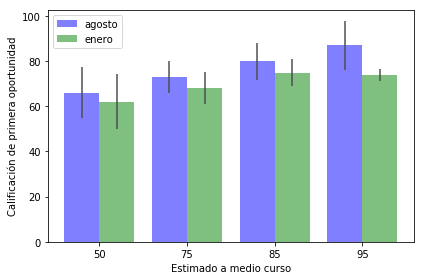

In [51]:
from numpy import isnan, nan_to_num
import matplotlib.pyplot as plt
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
x = o.loc[o.profe == 'elisa']
datos = pd.concat([x.loc[x.CF1op >= 70], x.loc[~isnan(x.CF2op)]]) # discretas con elisa
d = pd.DataFrame(datos, columns = ["CF1op", "eM", "inicio"])
d = d.dropna() 

lvls = d.groupby(['inicio', 'eM'])
fig, ax = plt.subplots()
col = ['b', 'g']
means = dict()
stddevs = dict()
lbls = []
for (sem, est), datos in lvls:
    if sem not in means:
        means[sem] = dict()
        stddevs[sem] = dict()
    if est not in lbls:
        lbls.append(est)
    means[sem][est] = datos.CF1op.mean()
    stddevs[sem][est] = datos.CF1op.std()
n = len(lbls)
i = 0
for sem in means:
    m = [means[sem][est] for est in lbls]
    sd = [stddevs[sem][est] for est in lbls]
    pos = [j + i * bw for j in range(n)]
    ax.bar(pos, m, bw, alpha = 0.5, color = col.pop(0), yerr = sd, \
           error_kw = {'ecolor': '0.3'}, label = sem)
    i += 1
ax.set_xlabel('Estimado a medio curso')
ax.set_ylabel('Calificación de primera oportunidad')
ax.set_xticks([i + bw / 2 for i in range(n)])
ax.set_xticklabels(['{:.0f}'.format(e) for e in means['enero'].keys()])
ax.legend()
fig.tight_layout()
plt.show()

Pues, sí, parecen afectar ambos factores por si sólo y el ANOVA también nos dice que interactúan: para los de agosto (azules), el pendiente de cómo sube la calificación obtenida en función de la calificación esperada es notable más fuerte que para los de enero (verdes). La curva para los azules parece lineal, mientras la de los verdes estanca entre 85 y 95.

Hagamos un ANOVA también con los estimados de los exámenes de la práctica anterior:

In [52]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/est.csv", sep = " ", header = None)
d.columns = ['puntos', 'tiempo', 'entrando', 'leidos', 'saliendo']
m = ols('puntos ~ tiempo + entrando + leidos + saliendo', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))

               sum_sq    df          F    PR(>F)
tiempo       1.025184   1.0   0.076914  0.782257
entrando    49.102702   1.0   3.683917  0.058597
leidos     279.603339   1.0  20.977165  0.000017
saliendo    50.558200   1.0   3.793115  0.055062
Residual  1039.657216  78.0        NaN       NaN
tiempo NO es significativo
entrando NO es significativo
leidos es significativo
saliendo NO es significativo
Residual NO es significativo


Lo único significativo, sin interacciones, sigue siendo el estimado después de haber leído las preguntas. Chequemos por interacciones.

In [54]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/est.csv", sep = " ", header = None)
d.columns = ['puntos', 'tiempo', 'entrando', 'leidos', 'saliendo']
m = ols('puntos ~ leidos * entrando + tiempo * leidos + leidos * saliendo', data = d).fit() 
a = sm.stats.anova_lm(m, typ = 2)
print(a)
n = len(a)
alpha = 0.05
for i in range(n):
    print("{:s} {:s}es significativo".format(a.index[i], "" if a['PR(>F)'][i] < alpha else "NO "))

                      sum_sq    df          F    PR(>F)
leidos            279.603339   1.0  20.411702  0.000023
entrando           52.230638   1.0   3.812960  0.054589
leidos:entrando     0.186162   1.0   0.013590  0.907507
tiempo              0.047433   1.0   0.003463  0.953232
tiempo:leidos       2.769468   1.0   0.202178  0.654266
saliendo           40.041140   1.0   2.923097  0.091455
leidos:saliendo     6.205129   1.0   0.452989  0.502988
Residual         1027.364137  75.0        NaN       NaN
leidos es significativo
entrando NO es significativo
leidos:entrando NO es significativo
tiempo NO es significativo
tiempo:leidos NO es significativo
saliendo NO es significativo
leidos:saliendo NO es significativo
Residual NO es significativo


No, nada ahí. Se podrían usar estos datos para llevar a cabo un MANOVA para modelar *ambos* el tiempo que están en el salón y los puntos que sacan en términos de los tres estimados, más que está incompleta y parcialmente documentada la implementación actual... 

In [61]:
import statsmodels as sm
from numpy import isnan, asarray
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/est.csv", sep = " ", header = None)
d.columns = ['puntos', 'tiempo', 'entrando', 'leidos', 'saliendo']
y = pd.DataFrame(d, columns = ['puntos', 'tiempo'])
x = pd.DataFrame(d, columns = ['entrando', 'leidos', 'saliendo'])
m = sm.multivariate.manova.MANOVA(y, x)
try:
    m.fit()
except NotImplementedError:
    print('aún no existe la implementación')


aún no existe la implementación


El __[análisis de componentes principales (PCA)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60__) sirve para reducir múltiples variable de entrada en una menor cantidad de variables para modelar la variable de interés. Funciona con datos numéricos que primero de normalizan (escalan todos a un mismo rango) y luego se proyectan a una dimensión deseada.
* Primero nos deshacemos de las columnas que no conviene codificar con números.
* Luego categorizamos las que sí convienen.
* Las reemplazamos con los números de las categorias.
* Estandrizamos rangos.
* Probamos reducción proyectando los datos a dos dimensiones.
* Visualizamos el resultado.

In [105]:
import ssl
import pandas as pd
from numpy import isnan, nan
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
                                                                                                                  
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
e = o.loc[o.profe == 'elisa']
d = pd.concat([e.loc[e.CF1op >= 70], e.loc[~isnan(e.CF2op)]])
print('Qué tenemos')
print(d.columns)
d = d.drop(['Unnamed: 0', 'Unnamed: 0.1', 'profe', 'ingreso', 'temas', 'sIng'], 1)
print('Con qué nos quedamos')
print('Qué categorizamos tal cual')
for c in ['grupo', 'sem', 'PE', 'inicio', 'fueAses', \
         'sabePromedio', 'sabeCreditos', 'sabeHoras', 'sabeAmbos', \
         'noSabeCreditos', 'noSabeHoras', 'noSabeNinguno']:
    cat = pd.Categorical(d[c])
    d[c] = cat.codes
print('Qué codificamos manualmente para mantener un crecimiento')
viejos = ['3-5 h', '2-3 h', '> 5 h', '1-2 h', '< 1 h', 'Nada', nan]
nuevos = [4, 2.5, 7, 1.5, 0.5, 0, 0]
for c in ['hrsEstudio_ini', 'hrsEstudio_mcu', 'hrsEstudio']:      
    d[c] = d[c].replace(viejos, nuevos) 
d.hrsNum = d.hrsNum.replace(nan, 0) # supongamos que los que no respondieron, no trabajan
for c in d.columns:
    print(d[c].unique(), d[c].dtype)   
xVars = ['grupo', 'sem', 'PE', 'inicio', 'hrsNum', \
         'eI', 'eM', 'eF','fueAses', 'cuantasTemas', 'formasApoyo', 'cuantosMedios', \
         'hrsEstudio_ini', 'hrsEstudio_mcu', 'hrsEstudio']
d.CF2op = d.CF2op.replace(nan, 0) # para no perder a los que pasaron en primera
d = d.dropna() # podemos únicamente usar los renglones que contienen todas las respuestas
x = d.loc[:, xVars].values
x = StandardScaler().fit_transform(x)
y1 = d.loc[:,['CF1op']].values
y2 = d.loc[:,['CF2op']].values
k = 2 # dimensiones deseadas
pca = PCA(n_components = k)
cd = pd.DataFrame(data = pca.fit_transform(x), columns = ['comp_{:d}'.format(i) for i in range(k)])
cd['CF1op'] = y1
cd['CF2op'] = y2
ordenado = pd.DataFrame.sort_values(cd, ['CF1op'], ascending = False)
display(cd.head(10))
cd.to_csv('pca_2d.csv')

Qué tenemos
Index(['Unnamed: 0', 'Unnamed: 0.1', 'profe', 'grupo', 'sem', 'PE', 'CF1op',
       'CF2op', 'ingreso', 'inicio', 'hrsNum', 'sabePromedio', 'sabeCreditos',
       'sabeHoras', 'sabeAmbos', 'noSabeCreditos', 'noSabeHoras',
       'noSabeNinguno', 'eI', 'eM', 'eF', 'fueAses', 'temas', 'cuantasTemas',
       'formasApoyo', 'cuantosMedios', 'hrsEstudio_ini', 'hrsEstudio_mcu',
       'hrsEstudio', 'sIng'],
      dtype='object')
Con qué nos quedamos
Qué categorizamos tal cual
Qué codificamos manualmente para mantener un crecimiento
[ 1  2  0 -1] int8
[3 1 0 2] int8
[ 1  2  0 -1] int8
[  84.   73.   70.   76.   74.   71.   72.   80.   91.   94.   87.   78.
   75.   79.   77.   95.  100.   92.   93.   83.   85.   82.   81.   97.
   88.   89.   90.   86.   52.   68.   61.   62.   34.   60.   63.   65.
   43.   59.   50.   57.   69.   67.   56.   64.   58.   54.   66.   51.] float64
[ nan  72.  71.  77.  74.  46.  56.  73.  66.  76.  67.  78.  80.  70.  65.
  79.  75.  63.  82.  68. 

,comp_0,comp_1,CF1op,CF2op
0,-0.333317,0.449117,84.0,0.0
1,1.422099,2.895988,70.0,0.0
2,-0.634262,-1.371485,76.0,0.0
3,0.852301,-1.487361,74.0,0.0
4,-2.600958,-0.203493,80.0,0.0
5,1.597327,-0.808490,80.0,0.0
6,-0.195075,-1.961620,80.0,0.0
7,-0.245727,-2.902387,91.0,0.0
8,-0.072629,1.180331,74.0,0.0
9,-2.365146,-2.405189,94.0,0.0


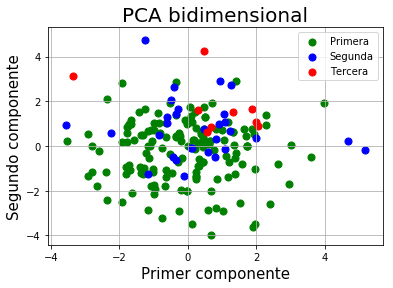

In [106]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
                                                                                                                  
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv('https://elisa.dyndns-web.com/teaching/comp/datasci/pca_2d.csv')

n = len(d)
pri = d.CF1op >= 70
seg = d.CF2op >= 70
ter = ~ (pri | seg)
assert n == sum(pri) + sum(seg) + sum(ter)

plt.title('PCA bidimensional', fontsize = 20)
plt.xlabel('Primer componente', fontsize = 15)
plt.ylabel('Segundo componente', fontsize = 15)
plt.scatter(d.loc[pri].comp_0, d.loc[pri].comp_1, c = 'g', s = 50)
plt.scatter(d.loc[seg].comp_0, d.loc[seg].comp_1, c = 'b', s = 50)
plt.scatter(d.loc[ter].comp_0, d.loc[ter].comp_1, c = 'r', s = 50)
plt.legend(['Primera', 'Segunda', 'Tercera'])
plt.grid()

Con esta información disponible, en dos dimensiones, no se separan los tres casos de alumnos (pasaron en primera, pasaron en segunda o no pasaron durante el semestre) de ninguna forma clara.

Regresaremos al tema de agrupamientos y clasificaciones en prácticas futuras.

En el octavo reporte, lleva a cabo por lo menos un ANOVA y un PCA con tus datos, visualizando y discutiendo los resultados de los dos.